# Project - EDA with Pandas Using the Boston Housing Data

## Introduction

In this section you've learned a lot about importing, cleaning up, analyzing (using descriptive statistics) and visualizing data. In this a more free form project you'll get a chance to practice all of these skills with the Boston Housing data set, which contains housing values in suburbs of Boston. The Boston Housing Data is commonly used by aspiring data scientists.

## Objectives

You will be able to:

* Load csv files using Pandas
* Find variables with high correlation
* Create box plots

## Goals

Use your data munging and visualization skills to conduct an exploratory analysis of the dataset below. At a minimum, this should include:

* Loading the data (which is stored in the file `train.csv`)
* Use built-in python functions to explore measures of centrality and dispersion for at least 3 variables
* Create *meaningful* subsets of the data using selection operations using `.loc`, `.iloc` or related operations. Explain why you used the chosen subsets and do this for 3 possible 2-way splits. State how you think the 2 measures of centrality and/or dispersion might be different for each subset of the data. Examples of potential splits:
    - Create a 2 new dataframes based on your existing data, where one contains all the properties next to the Charles river, and the other one contains properties that aren't.
    - Create 2 new dataframes based on a certain split for crime rate.
* Next, use histograms and scatterplots to see whether you observe differences for the subsets of the data. Make sure to use subplots so it is easy to compare the relationships.

## Variable Descriptions

This data frame contains the following columns:

#### crim  
per capita crime rate by town.

#### zn  
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus  
proportion of non-retail business acres per town.

#### chas  
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox  
nitrogen oxides concentration (parts per 10 million).

#### rm  
average number of rooms per dwelling.

#### age  
proportion of owner-occupied units built prior to 1940.

#### dis  
weighted mean of distances to five Boston employment centers.

#### rad  
index of accessibility to radial highways.

#### tax  
full-value property-tax rate per $10,000.

#### ptratio  
pupil-teacher ratio by town.

#### black  
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat  
lower status of the population (percent).

#### medv  
median value of owner-occupied homes in $10000s.
  
  
  
Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

## Summary

Congratulations, you've completed your first "freeform" exploratory data analysis of a popular data set!

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

In [7]:
df = pd.read_csv("train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [73]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [71]:
#1. Measures of central tendency/dispersion for ptratio
students_mean = df['ptratio'].mean()
students_median = df['ptratio'].median()
stud_variance = df['ptratio'].var()
std_students = df['ptratio'].std()
print('Mean ' + str(students_mean))
print('Median ' + str(students_median))
print('Var ' + str(stud_variance))
print('Std ' + str(std_students))

Mean 18.448048048047994
Median 19.0
Var 4.630335033828984
Std 2.151821329439083


In [79]:
#2. Measures of central tendency/dispersion for medv 
medv_mean = df['medv'].mean()
medv_median = df['medv'].median()
medv_variance = df['medv'].var()
medv_std= df['medv'].std()
print('Mean ' + str(medv_mean))
print('Median ' + str(medv_median))
print('Var ' + str(medv_variance))
print('Std ' + str(medv_std))

Mean 22.768768768768783
Median 21.6
Var 84.15251564817828
Std 9.17346802731542


In [75]:
#3. Measures of central tendency/dispersion for crim
crim_mean = df['crim'].mean()
crim_median = df['crim'].median()
crim_variance = df['crim'].var()
crim_std = df['crim'].std()
print('Mean ' + str(crim_mean))
print('Median ' + str(crim_median))
print('Var ' + str(crim_variance))
print('Std ' + str(crim_std))

Mean 3.360341471471471
Median 0.26169000000000003
Var 54.05590116192464
Std 7.3522718367811075


In [95]:
#SPLIT #1
#This split is to anaylyze the relationship between crime and pupils-to-teacher ratio

#Lower = less students per teacher
#Upper = more students per teacher

lower_ptratio = df.loc[df['ptratio'] < 19]
upper_ptratio = df.loc[df['ptratio'] > 19]

lower_ptratio_crim_mean = lower_ptratio['crim'].mean()
lower_ptratio_crim_median = lower_ptratio['crim'].median()
lower_ptratio_crim_var = lower_ptratio['crim'].var()
lower_ptratio_crim_std = lower_ptratio['crim'].std()

upper_ptratio_crim_mean = upper_ptratio['crim'].mean()
upper_ptratio_crim_median = upper_ptratio['crim'].median()
upper_ptratio_crim_var = upper_ptratio['crim'].var()
upper_ptratio_crim_std = upper_ptratio['crim'].std()

print('Lower Mean: ' + str(lower_ptratio_crim_mean) 
      + "\nLower Median: " + str(lower_ptratio_crim_median) 
      + "\nLower Var: " + str(lower_ptratio_crim_var) 
      + "\nLower Std: " + str(lower_ptratio_crim_std))

print('\nUpper Mean: ' + str(upper_ptratio_crim_mean) 
      + "\nUpper Median: " + str(upper_ptratio_crim_median) 
      + "\nUpper Var: " + str(upper_ptratio_crim_var) 
      + "\nUpper Std: " + str(upper_ptratio_crim_std))

#These results clearly show a relationship between crime rates and the number of students per teacher
#The more students per teacher, the higher the crime rate

Lower Mean: 0.4214220606060605
Lower Median: 0.1029
Lower Var: 0.49346986668719084
Lower Std: 0.7024741039263944

Upper Mean: 6.359623090909089
Upper Median: 3.69311
Upper Var: 90.99469363510566
Upper Std: 9.539113881021951


<IPython.core.display.Javascript object>


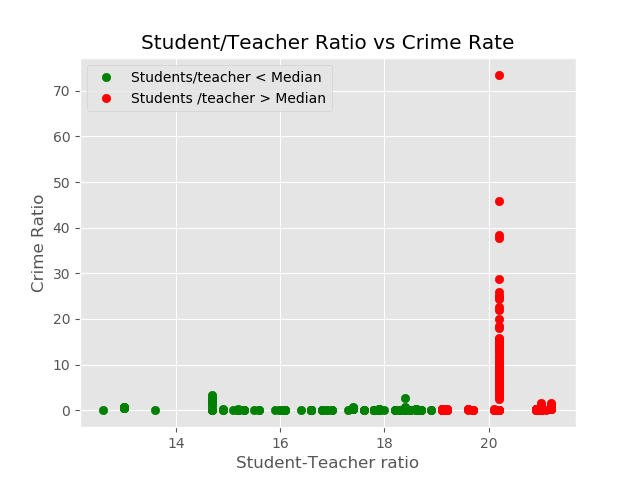

In [117]:
fig = plt.figure()
ax1 = fig.add_subplot(111, title='Student/Teacher Ratio vs Crime Rate')

ax1.scatter(lower_ptratio['ptratio'], lower_ptratio['crim'], color='g',label='Students/teacher < Median')
ax1.scatter(upper_ptratio['ptratio'], upper_ptratio['crim'], color='r',label='Students /teacher > Median')

ax1.set_xlabel("Student-Teacher ratio")
ax1.set_ylabel("Crime Ratio")
plt.legend(loc='upper left');
plt.show()


<IPython.core.display.Javascript object>


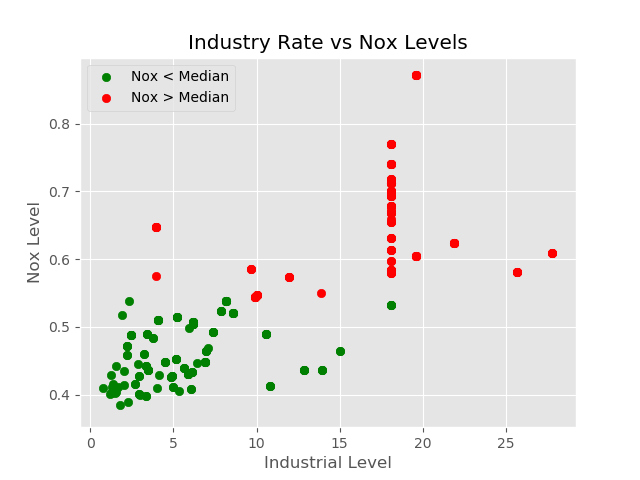

In [116]:
#SPLIT #2
#This split is to anaylyze the relationship between the nitrogen oxides concentration and industry concentration

#Data split: based on median value of nox
df_lower_nox = df.loc[df['nox'] < 0.538]
df_upper_nox = df.loc[df['nox'] > 0.538]

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, title='Industry Rate vs Nox Levels')

ax2.scatter(df_lower_nox['indus'], df_lower_nox['nox'], color='g',label='Nox < Median')
ax2.scatter(df_upper_nox['indus'], df_upper_nox['nox'], color='r',label='Nox > Median')

ax2.set_xlabel("Industrial Level")
ax2.set_ylabel("Nox Level")
plt.legend(loc='upper left');
plt.show()

#This shows that the concentrations of NOX are higher in areas where the industrial rate is higher


<IPython.core.display.Javascript object>


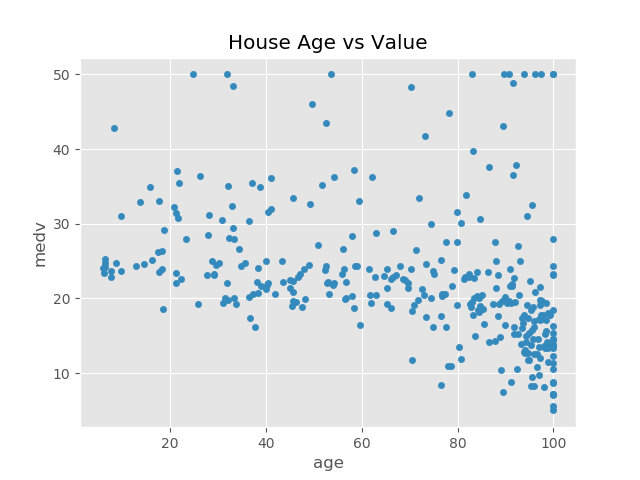

Text(0.5, 1.0, 'House Age vs Value')

In [60]:
plot2 = df.plot('age', 'medv', kind='scatter')
plot2.set_title('House Age vs Value')

<IPython.core.display.Javascript object>


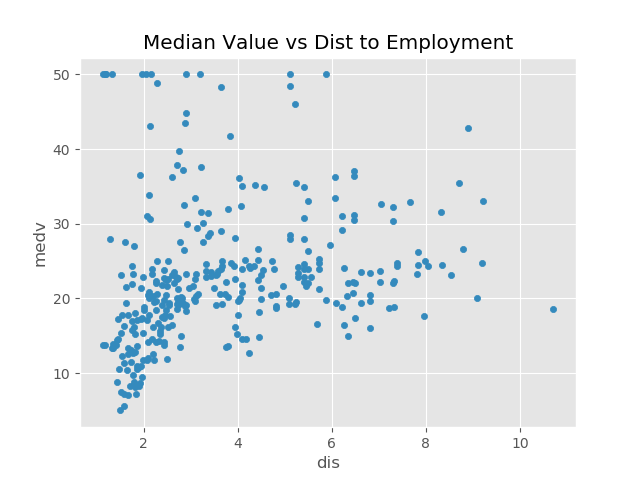

Text(0.5, 1.0, 'Median Value vs Dist to Employment')

In [59]:
plot2 = df.plot('dis','medv', kind='scatter')
plot2.set_title('Median Value vs Dist to Employment')

<IPython.core.display.Javascript object>


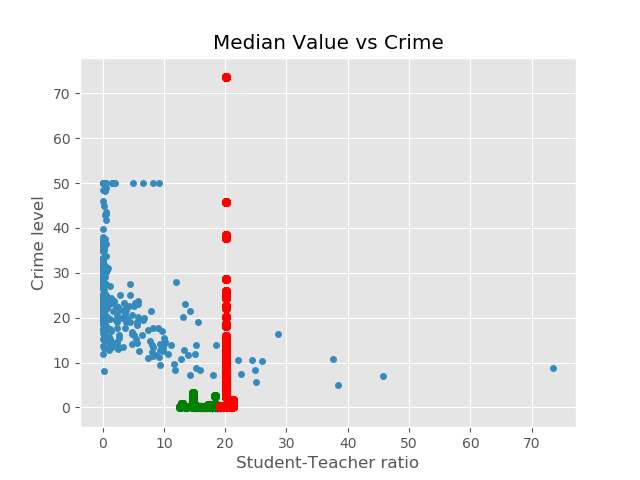

Text(0.5, 1.0, 'Median Value vs Crime')

In [61]:
plot3 = df.plot('crim','medv', kind='scatter')
plot3.set_title('Median Value vs Crime')